In [2]:
import pandas as pd

In [3]:
eps = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]
sizes = [10, 30, 50, 70]

In [12]:
d = pd.DataFrame()
for e in eps:
    for n in sizes:
        data = pd.read_csv(f"data/result_{n}_{e}.csv")
        data['eps'] = e
        data['sample_size'] = n
        d = d.append(data)

In [52]:
import numpy as np

In [209]:
n = 10
eps = 0.02

def plot_scatter_p_error(n, eps, id, ax):
    col = f"p_beta_{n}_{eps}"
    d['p'] = np.log(d[col])
    mmn = d[[f'pns_{i}' for i in range(80)]].min(axis=1)
    mmx = d[[f'pns_{i}' for i in range(80)]].max(axis=1)
    
    mn = d[[f'pns_{i}' for i in range(n)]].min(axis=1)
    mx = d[[f'pns_{i}' for i in range(n)]].max(axis=1)

    d['err'] =  np.sqrt(((mmx - mx) ** 2 + (mmn - mn)**2)/(2*(mmx - mmn))**2) #+   #d["pns_l_exact"]
    #mdr = np.min(d['err'])

    #d['err'] = np.log(d['err'] + mdr)
    #print(d[(d['p'] < 1.0)  & (d['index'] == id) & (d.sample_size == n) & (d.eps == eps)].ps1)
    d[(d['p'] >= np.log(0.95)) & (d['index'] == id) & (d.sample_size == n) & (d.eps == eps)][['err', "p"]].plot.scatter("p", "err", ax = ax)

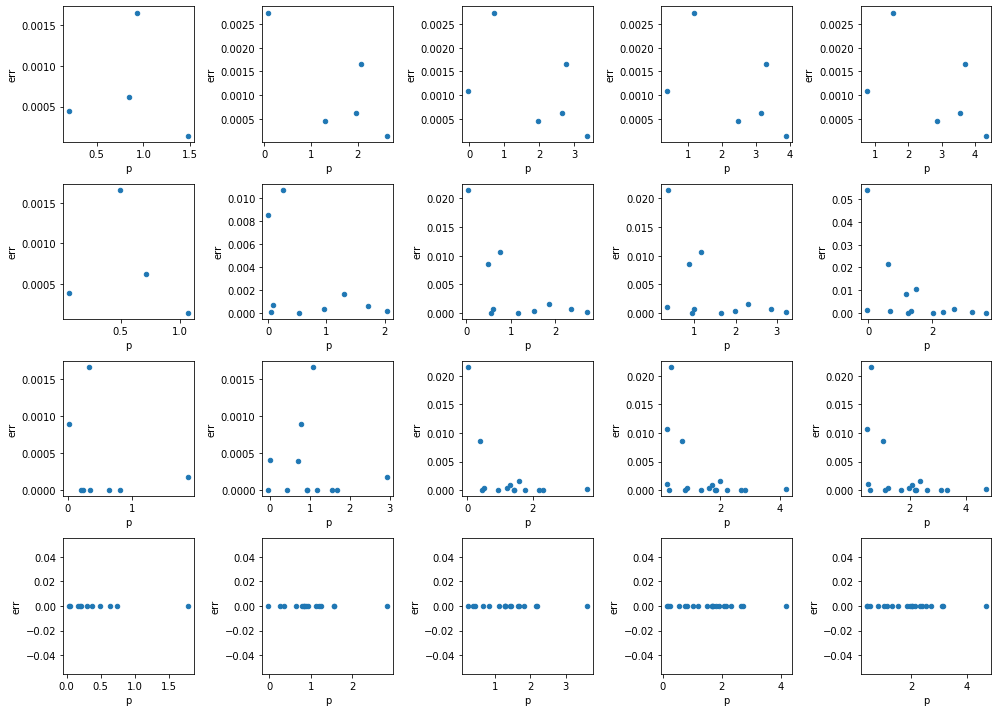

In [210]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(4,5, figsize=(14,10))
r = 0 
c = 0
for eps in [0.02,0.04,0.06, 0.08,0.1]:
    r = 0
    for n in [10,30,50,70]:
        plot_scatter_p_error(n,eps, 2, axs[r,c])
        r = r + 1
    c = c+1
plt.tight_layout()

In [176]:
d[["p_beta_50_0.02"]].max()

p_beta_50_0.02    1.499492e+35
dtype: float64

In [198]:
n = 30 
eps = 0.06
id = 2

col = f"p_beta_{n}_{eps}"
d['p'] = np.log(d[col])
mmn = d[[f'pns_{i}' for i in range(80)]].min(axis=1)
mmx = d[[f'pns_{i}' for i in range(80)]].max(axis=1)

mn = d['a'] = d[[f'pns_{i}' for i in range(n)]].min(axis=1)
mx = d['b'] = d[[f'pns_{i}' for i in range(n)]].max(axis=1)
L = d['L'] = mx - mn
d['ameL'] = mn - eps*L
d['bpeL'] = mx + eps*L

d['err'] =  mmx - mx #d["pns_l_exact"]
d[(d['p'] > 0) & (d['index'] == id) & (d.sample_size == n) & (d.eps == eps)][[f'p_beta_{n}_{eps}', f'num_p_beta_{n}_{eps}', f'den_p_beta_{n}_{eps}', 'a', 'b', "ameL", 'bpeL']]

,p_beta_30_0.06,num_p_beta_30_0.06,den_p_beta_30_0.06,a,b,ameL,bpeL
18,3.205364,0.001634,0.000510,1.942579e-03,0.965299,-0.055859,1.023100
45,4.597659,0.000722,0.000157,9.990060e-04,0.977412,-0.057586,1.035997
81,1.644714,0.000850,0.000517,2.038979e-03,0.953248,-0.055034,1.010321
99,6.417097,0.000326,0.000051,4.497403e-05,0.984842,-0.059043,1.043929
144,1.828293,0.000871,0.000476,2.017497e-03,0.956667,-0.055261,1.013946
216,2.149858,0.000637,0.000296,3.603408e-04,0.962097,-0.057344,1.019801
225,10.549087,0.001015,0.000096,1.673721e-03,0.985819,-0.057375,1.044868
324,1.732379,0.000596,0.000344,3.003897e-04,0.956157,-0.057051,1.013509
504,14.858906,0.000586,0.000039,2.818476e-04,0.989507,-0.059072,1.048860
513,1.035593,0.000140,0.000135,4.055910e-07,0.941111,-0.056466,0.997577


In [208]:
np.exp(-0.5)

0.6065306597126334